# Gemini API 멀티모달 호출하기

### Install the Python SDK

In [ ]:
!pip install -q -U google-generativeai

### Import packages & Helpers

In [1]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

# Helpers
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [2]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
# GOOGLE_API_KEY="<YOUR GOOGLE API KEY>"
import os
import google.generativeai as genai

GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## 이미지 및 텍스트 입력에서 텍스트 생성하기

Gemini는 텍스트와 이미지 및 입력을 모두 허용하는 멀티모달 모델(`gemini-pro-vision`)을 제공합니다. `GenerativeModel.generate_content` API는 멀티모달 프롬프트를 처리하고 텍스트 출력을 반환하도록 설계되었습니다.

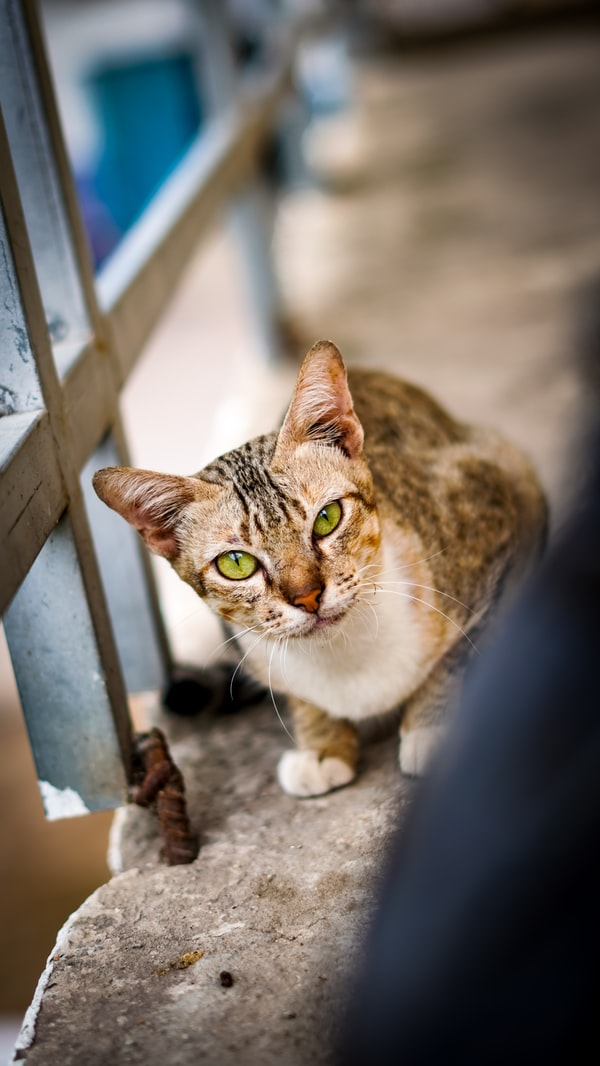

In [3]:
import PIL.Image

img = PIL.Image.open('data/cat.jpg')
img

gemini-pro-vision` 모델을 사용하고 `generate_content`를 사용하여 이미지를 모델에 전달합니다.

In [8]:
model = genai.GenerativeModel('gemini-2.0-flash')

In [9]:
response = model.generate_content(img)

to_markdown(response.text)

> Here are the bounding box detections:
> ```json
> [
>   {"box_2d": [319, 153, 746, 919], "label": "cat"}
> ]
> ```

프롬프트에 텍스트와 이미지를 모두 제공하려면 문자열과 이미지가 포함된 목록을 전달 할 수 있습니다.

In [10]:
response = model.generate_content(["이 사진에 대해 자세히 설명해줘",
                                   img])


In [11]:
to_markdown(response.text)

> 이 사진은 선명한 녹색 눈을 가진 매력적인 고양이를 클로즈업해서 찍은 사진입니다. 고양이는 콘크리트 난간에 앉아 있는 것처럼 보이며, 프레임 왼쪽에는 파란색으로 칠해진 금속 난간이 있습니다. 사진의 배경은 흐릿하여 고양이를 주요 피사체로 강조합니다.
> 
> 고양이는 고개를 살짝 갸우뚱하며 카메라를 응시하고 있어 호기심을 자아냅니다. 털은 갈색과 흰색의 얼룩무늬로 이루어져 있으며, 가슴과 발은 흰색입니다. 털에는 줄무늬가 있어 탭비 고양이임을 암시합니다. 고양이의 표정은 차분하고 친근합니다.
> 
> 사진의 조명은 부드럽고 확산되어 있어 고양이의 특징을 잘 드러냅니다. 초점이 날카로워 털과 눈의 세부 사항을 명확하게 볼 수 있습니다. 전반적인 구성은 시선을 고양이에게 집중시켜 몰입감을 높입니다.

## 멀티모달 프롬프트 설계하기

### 1. 내용 파싱하기

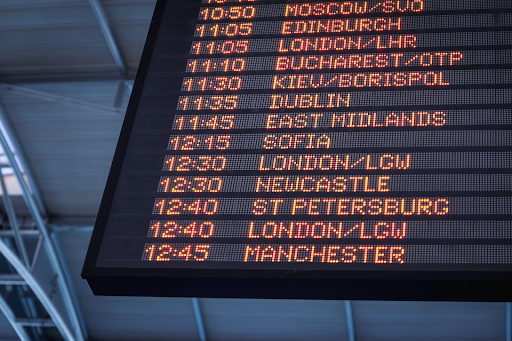

In [12]:
img = PIL.Image.open('data/timetable.png')
img

In [13]:
response = model.generate_content(["이 사진에 대해 자세히 설명해줘",
                                   img])

In [14]:
to_markdown(response.text)

> Here is a description of the image:
> 
> **Overall Impression:**
> 
> The image shows a close-up of an electronic departures board at an airport or train station. The board displays flight or train times and destinations in a bright orange, LED-style font against a dark background. The angle is slightly upward, suggesting the board is positioned above eye level.
> 
> **Details:**
> 
> *   **Departures Board:** The board itself is black. The text is in a digital font, typical of electronic display boards. The text is in orange, which contrasts starkly with the black backdrop, making it easy to read.
> *   **Times and Destinations:** The board lists departure times, followed by city names or airport codes. Some of the visible destinations include: Moscow, Edinburgh, London, Bucharest, Kiev, Dublin, East Midlands, Sofia, Newcastle, St Petersburg and Manchester.
> *   **Background:** The background shows some structural elements of a building, likely a train station or an airport terminal. These appear to be structural beams.
> *   **Lighting:** The scene appears to be lit with overhead artificial lighting. The LED display itself provides a significant amount of light.
> 
> **Overall, the image captures a common scene from the travel environment, highlighting the information that passengers rely on to navigate their journeys.**

In [15]:
response = model.generate_content(["이 이미지에 표시된 공항 보드의 시간과 도시를 목록으로 파싱합니다.",
                                   img])
to_markdown(response.text)

> Here's a list of the times and cities from the airport board, based on the image provided:
> 
> *   **10:50** Moscow/SVO
> *   **11:05** Edinburgh
> *   **11:05** London/LHR
> *   **11:10** Bucharest/OTP
> *   **11:30** Kiev/Borispol
> *   **11:35** Dublin
> *   **11:45** East Midlands
> *   **12:15** Sofia
> *   **12:30** London/LGW
> *   **12:30** Newcastle
> *   **12:40** St Petersburg
> *   **12:40** London/LGW
> *   **12:45** Manchester

### 2. 단계별로 분석하기

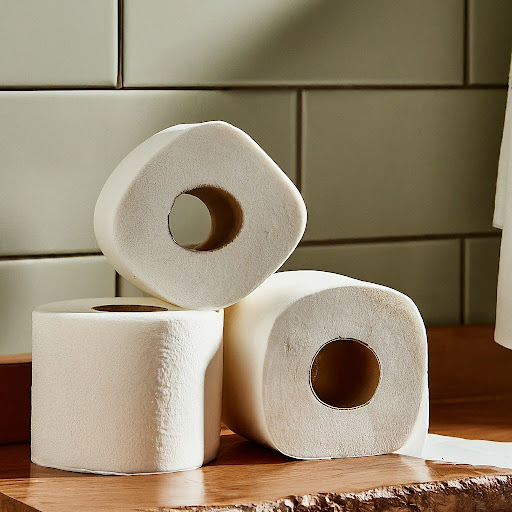

In [16]:
img = PIL.Image.open('data/toilet-paper.jpg')
img

In [17]:
response = model.generate_content(["화장실 휴지 몇개야?",
                                   img])
to_markdown(response.text)

> 세 개의 화장실 휴지가 있습니다.

In [18]:
text = """\
1. 먼저 이 사진에 화장지 롤이 몇 개인지 세세요.
2. 그런 다음 보통 사람이 하루에 사용하는 화장지 양을 결정합니다.
3. 이 화장지 롤의 지속 시간을 계산하세요."""

response = model.generate_content([text,
                                   img])
to_markdown(response.text)

> 알았어요. 다음은 요청하신 대로 제공된 정보를 바탕으로 화장지의 지속 기간을 추정하는 데 필요한 단계입니다.
> 
> 1.  사진에서 보이는 화장지 롤은 3개입니다.
> 
> 2.  보통 사람이 하루에 사용하는 화장지 양을 계산하려면 평균을 내야 합니다. 평균적인 사람은 하루에 57장을 쓴다고 합니다.
> 
> 3.  화장지가 지속되는 시간을 추정하려면 다음을 알아야 합니다. 화장지가 몇 장입니까. 화장지 한 롤에 평균 500장이 있다고 가정하겠습니다. 그러면 3개의 화장지 롤에 1,500장이 됩니다.
> 
> 4.  1,500을 평균 사람이 하루에 사용하는 57장으로 나누면 이 화장지 롤이 약 26일 동안 지속됩니다.

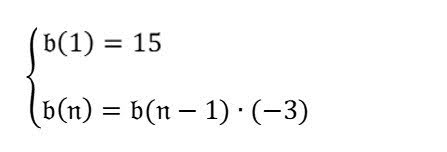

In [20]:
img = PIL.Image.open('data/math.jpg')
img

In [21]:
response = model.generate_content(["순열의 n=4일 때 값",
                                   img])
to_markdown(response.text)

> The image shows a recursive formula for a sequence `b(n)`. We are given that `b(1) = 15` and `b(n) = b(n-1) * (-3)`. We want to find `b(4)`.
> 
> We can find the values of `b(2)`, `b(3)`, and `b(4)` using the recursive formula:
> 
> *   `b(2) = b(1) * (-3) = 15 * (-3) = -45`
> *   `b(3) = b(2) * (-3) = -45 * (-3) = 135`
> *   `b(4) = b(3) * (-3) = 135 * (-3) = -405`
> 
> Therefore, `b(4) = -405`.
> 
> Final Answer: The final answer is $\boxed{-405}$

In [22]:
text="""\
먼저 이미지의 수식을 파싱합니다.

그런 다음 공식에 따라 '순서의 네 번째 항은 무엇인가요?'라고 답하세요."""
response = model.generate_content([text,
                                   img])
to_markdown(response.text)

> 이미지에 표시된 수열의 공식은 다음과 같습니다.
> 
> * b(1) = 15
> * b(n) = b(n-1) * (-3)
> 
> 수열의 네 번째 항을 구하려면 먼저 2번째 항과 3번째 항을 계산해야 합니다.
> 
> * b(2) = b(1) * (-3) = 15 * (-3) = -45
> * b(3) = b(2) * (-3) = -45 * (-3) = 135
> * b(4) = b(3) * (-3) = 135 * (-3) = -405
> 
> 따라서 수열의 네 번째 항은 -405입니다.

### 3. 출력 형식을 지정하기

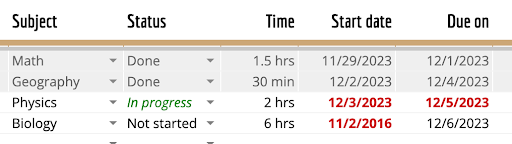

In [23]:
img = PIL.Image.open('data/excel-example.png')
img

In [24]:
response = model.generate_content(["이 이미지의 테이블을 마크다운 형식으로 파싱합니다.",
                                   img])
to_markdown(response.text)

> ```
> | Subject     | Status       | Time    | Start date | Due on      |
> | ----------- | ------------ | ------- | ---------- | ----------- |
> | Math        | Done         | 1.5 hrs | 11/29/2023 | 12/1/2023   |
> | Geography   | Done         | 30 min  | 12/2/2023  | 12/4/2023   |
> | Physics     | In progress  | 2 hrs   | 12/3/2023  | 12/5/2023   |
> | Biology     | Not started  | 6 hrs   | 11/2/2016  | 12/6/2023   |
> ```

In [25]:
response = model.generate_content(["이 이미지의 테이블을 마크다운 json으로 파싱합니다.",
                                   img])
to_markdown(response.text)

> ```json
> [
>   {
>     "Subject": "Math",
>     "Status": "Done",
>     "Time": "1.5 hrs",
>     "Start date": "11/29/2023",
>     "Due on": "12/1/2023"
>   },
>   {
>     "Subject": "Geography",
>     "Status": "Done",
>     "Time": "30 min",
>     "Start date": "12/2/2023",
>     "Due on": "12/4/2023"
>   },
>   {
>     "Subject": "Physics",
>     "Status": "In progress",
>     "Time": "2 hrs",
>     "Start date": "12/3/2023",
>     "Due on": "12/5/2023"
>   },
>   {
>     "Subject": "Biology",
>     "Status": "Not started",
>     "Time": "6 hrs",
>     "Start date": "11/2/2016",
>     "Due on": "12/6/2023"
>   }
> ]
> ```